In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data_df = pd.merge(city_df, ride_df,
                                 how='inner', on='city')
# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

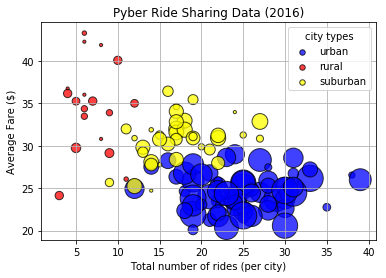

In [3]:
# Obtain the x and y coordinates for each of the three city types
is_urban = combined_data_df["type"] == "Urban"
urban = combined_data_df[is_urban]
urban_name = urban.groupby("city")
is_rural = combined_data_df["type"] == "Rural"
rural = combined_data_df[is_rural]
rural_name = rural.groupby("city")
is_suburban = combined_data_df["type"] == "Suburban"
suburban = combined_data_df[is_suburban]
suburban_name = suburban.groupby("city")

xurban = urban_name.ride_id.count()
yurban = urban_name["fare"].mean()
zurban = urban_name["driver_count"].mean()
xrural = rural_name.ride_id.count()
yrural = rural_name["fare"].mean()
zrural = rural_name["driver_count"].mean()

xsuburban = suburban_name.ride_id.count()
ysuburban = suburban_name["fare"].mean()
zsuburban = suburban_name["driver_count"].mean()

# Build the scatter plots for each city types

urban_plot = plt.scatter(xurban, yurban, marker="o", facecolors="blue", edgecolors="black",
            s=zurban*10
            , alpha=.75, label="urban")
rural_plot = plt.scatter(xrural, yrural, marker="o", facecolors="red", edgecolors="black",
            s=zrural*10
            , alpha=.75, label="rural")

suburban_plot = plt.scatter(xsuburban, ysuburban, marker="o", facecolors="yellow", edgecolors="black",
            s=zsuburban*10
            , alpha=.75, label="suburban")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare ($)")
# Create a legend
legend = plt.legend(handles=[urban_plot, rural_plot, suburban_plot], loc="best", title="city types")


# Incorporate a text label regarding circle size
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
# Save Figure
plt.savefig("../Images/Pyber Ride Sharing.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

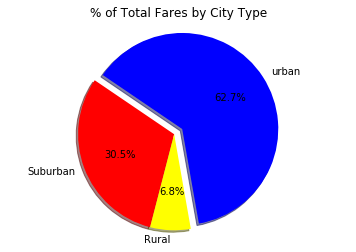

In [5]:
# Calculate Type Percents
urban_percent_fares =(urban["fare"].sum()/combined_data_df["fare"].sum())*100
suburban_percent_fares =(suburban["fare"].sum()/combined_data_df["fare"].sum())*100
rural_percent_fares = (rural["fare"].sum()/combined_data_df["fare"].sum())*100

pie_percent_fares = [urban_percent_fares, suburban_percent_fares, rural_percent_fares]
colors = ["blue", "red", "yellow"]
pies = ["urban", "Suburban", "Rural"]
explode = [0.1,0,0]
# Build Pie Chart

plt.pie(pie_percent_fares, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("../Images/Fares by city type.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

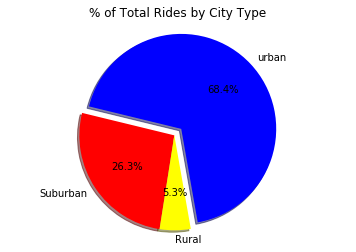

In [7]:
# Calculate Type Percents
urban_percent_rides =(urban["ride_id"].count()/combined_data_df["ride_id"].count())*100
suburban_percent_rides =(suburban["ride_id"].count()/combined_data_df["ride_id"].count())*100
rural_percent_rides = (rural["ride_id"].count()/combined_data_df["ride_id"].count())*100

pie_percent_rides = [urban_percent_rides, suburban_percent_rides, rural_percent_rides]
colors = ["blue", "red", "yellow"]
pies = ["urban", "Suburban", "Rural"]
explode = [0.1,0,0]
# Build Pie Chart

plt.pie(pie_percent_rides, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("../Images/Rides by city type.png")
plt.show()

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

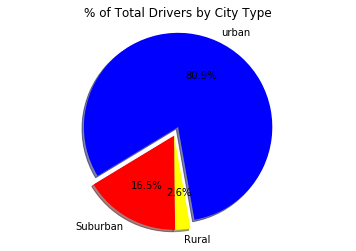

In [14]:
# drop duplicate cities
Combined_unique = combined_data_df.drop_duplicates(subset=["city"], keep='first', inplace=False)
urban_unique = urban.drop_duplicates(subset=["city"], keep='first', inplace=False)
rural_unique = rural.drop_duplicates(subset=["city"], keep='first', inplace=False)
suburban_unique = suburban.drop_duplicates(subset=["city"], keep='first', inplace=False)
# Calculate Type Percents
urban_percent_driver_count =(urban_unique["driver_count"].sum()/Combined_unique["driver_count"].sum())*100
suburban_percent_driver_count =(suburban_unique["driver_count"].sum()/Combined_unique["driver_count"].sum())*100
rural_percent_driver_count = (rural_unique["driver_count"].sum()/Combined_unique["driver_count"].sum())*100
# list of our percentage results
pie_percent_driver_count = [urban_percent_driver_count, suburban_percent_driver_count, rural_percent_driver_count]
# pie chart colors
colors = ["blue", "red", "yellow"]
#titles
pies = ["urban", "Suburban", "Rural"]

explode = [0.1,0,0]
#Build Pie Chart

plt.pie(pie_percent_driver_count, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
#Save Figure
plt.savefig("../Images/Driver_count by city type.png")


In [12]:
# Show Figure
plt.show()

120